## Sliding Window Adaptive Histogram Equalization

In [3]:
path = 'C:\IITGN 2nd year\ES 204 Digital Systems\Local-Contrast-Enhancement-of-Image\Local Contrast Enhancement of Image\\105.jpg'
import matplotlib.image as Image
import numpy as np
import matplotlib.pyplot as plt

(150, 150)


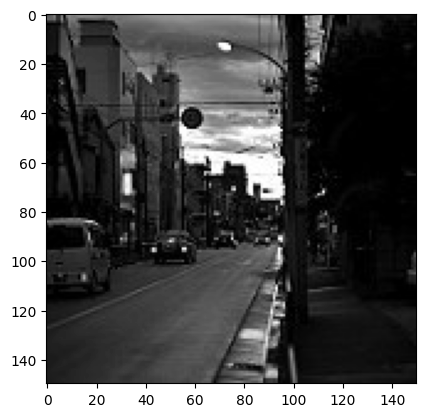

In [17]:
img= Image.imread(path)
print (img.shape)
plt.imshow(img, cmap='gray')

[[ 71  78  85 ...  19  14   8]
 [ 95  93  99 ...  20  14   9]
 [102  97  97 ...  12   8   8]
 ...
 [ 28  29  30 ...  21  20  20]
 [ 27  28  29 ...  16  15  15]
 [ 27  28  29 ...  13  12  12]]


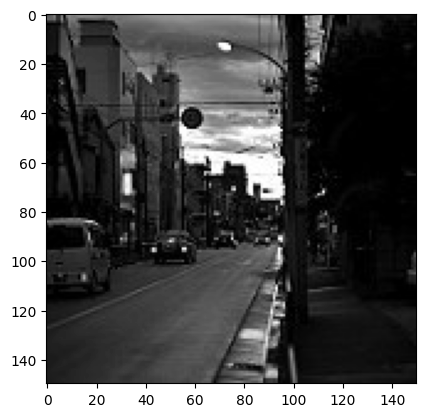

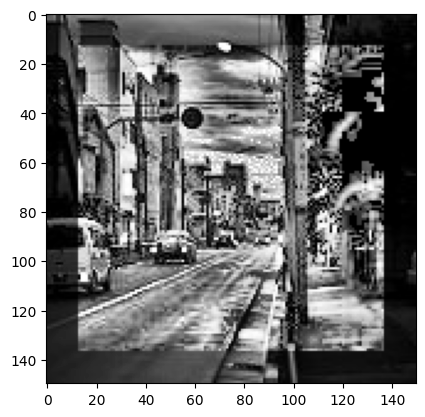

In [22]:
equalised_img = np.copy(img)
window_size = (25,25)
w= (window_size[0]-1)//2

for i in range(1,img.shape[0]-window_size[0]):
    for j in range(1,img.shape[1]-window_size[1]):
        prev_window = img[i-1:i-1+window_size[0], j:j+window_size[1]]
        window = img[i:i+window_size[0], j:j+window_size[1]]
        w_1d = prev_window.flatten()
        
        hist_1=np.zeros(256)
        hist_2 = np.zeros(256)
        hist_3= np.zeros(256)
        for pix in w_1d:
            hist_1[pix]+=1
        for pix in prev_window[0]:
            hist_2[pix]+=1
        for pix in window[-1]:
            hist_3[pix]+=1

        hist = hist_1-hist_2+hist_3

        cdf = np.zeros(256)
        cdf[0] = hist[0]
        for k in range (1,256):
            cdf[k]=cdf[k-1]+hist[k]
        
        cdf_normalised = (cdf - cdf[cdf>0].min())/(w_1d.size-cdf[cdf>0].min())
        histo_equal = np.round(cdf_normalised*255).astype(np.uint8)
        equalised_img[i+w, j+w] = histo_equal[window[w, w]]

print(equalised_img)
plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(equalised_img, cmap='gray')
